### Student Information
Name: 陳彥瑞

Student ID: 114233511

GitHub ID: dan4546

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [199]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download("punkt_tab")
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import matplotlib.pyplot as plt
import math
import helpers.data_mining_helpers as dmh
import seaborn as sns
newdataset = pd.read_csv(r"C:\Users\danie\OneDrive\Desktop\Lab1\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv")
print(newdataset.shape)
print(newdataset.columns)

(847, 16)
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [200]:
newdataset[::70]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.000000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
140,comment,2025-04-11 15:33:32,mmkuflw,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,ivegotwonderfulnews,https://www.reddit.com/r/stocks/comments/1jwlr...,2,NaN,NaN,wholesale ask premium on 1 oz credit suisse in...,0.900000,-0.600000,-1.0,"['yesterday', 'credit', 'ask', 'premium', 'sui...",0.0
210,comment,2025-04-11 14:33:55,mmkic21,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,InvisibleEar,https://www.reddit.com/r/stocks/comments/1jwlr...,4,NaN,NaN,I kind of think the plan is to distract people...,0.550000,0.400000,1.0,"['Salvador', 'plan', 'yoyo', 'AOC', 'think', '...",0.0
280,comment,2025-04-10 14:40:26,mme8wxn,StockMarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Not great Bob,0.750000,0.800000,1.0,['Bob'],-1.0
350,comment,2022-01-11 11:38:13,hs71cdb,stockstobuytoday,Green today: $SLV $VIX $PLTK $UUP What else?,[deleted],https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,"You don’t buy when it’s green, u buy when it’s...",0.150000,-0.100000,-1.0,"['t', 'buy']",1.0
420,comment,2025-04-04 13:49:13,mldgwm4,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,--Shake--,https://www.reddit.com/r/stocks/comments/1j0w7...,7,NaN,NaN,Sold it all. Think I'm doing pretty good.,0.800000,0.475000,1.0,[],1.0
490,comment,2021-02-01 15:54:18,glm1ewv,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",mtol115,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,SLV =/= physical silver,0.571429,-0.375000,-1.0,"['=/=', 'SLV', 'silver']",0.0
560,comment,2021-02-01 21:05:05,glne02g,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",stemi67,https://www.reddit.com/r/stocks/comments/la34b...,2,NaN,NaN,I learned the hard way in football.. in colleg...,0.570833,-0.345833,-1.0,"['war', 'pride', 'Money', '..', 'NFL', 'colleg...",0.0
630,comment,2021-02-01 15:42:03,gllzfjr,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",twittidoo,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Yes it's true. I bought myself silver earings,0.650000,0.350000,1.0,['silver'],0.0


In [201]:
for i in range(3):
    print(f"--- Document {i} ---")
    print(newdataset['title'][i])
    print(newdataset['text'][i],'\n')

--- Document 0 ---
Retardation is on the menu boys! WSB is so back
Calls on retards 

--- Document 1 ---
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever. 

--- Document 2 ---
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Seeing lots of red in the ticker. 



In [202]:
query = "type == 'post'"
newdataset.query(query)[:10]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
48,post,2025-04-02 13:00:42,1jpnz8b,stockstobuytoday,Earnings for current week,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,\r\n\r\n [MarketWatch: Stock Market News - Fi...,0.000000,0.000000,0.0,"['Stock', 'MarketWatch', 'catalyst', 'stockbuy...",0.0
63,post,2025-03-01 10:00:42,1j0w73o,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,https://www.reddit.com/r/stocks/comments/1j0w7...,79,4.0,0.95,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.000000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
72,post,2025-04-04 6:25:04,1jr5ag5,stockstobuytoday,Spending first $250 tmmw on stocks,Alarmed_Champion_913,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"A lot of stocks are down right now, and I'm th...",0.347959,0.005102,1.0,"['cuz', 'OPTT', 'BLGO', 'im', 'money', 'idea',...",0.0
105,post,2025-04-04 9:01:07,1jr7fe1,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,\r\n\r\n [World Markets (stockbuyvest.com)](),0.000000,0.000000,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0
134,post,2021-06-21 23:49:22,o590v2,stockstobuytoday,GSAT MOONING???,Jimenezmf777,https://www.reddit.com/r/stockstobuytoday/comm...,11,0.0,0.92,"Word on the street, new price target 3+?\r\n\r...",0.454545,0.136364,1.0,"['street', 'price', 'Word', '/', 'target']",0.0
158,post,2022-02-27 14:56:07,t2px6r,stockstobuytoday,What will happen with 2022?,Superb_Nebula8800,https://www.reddit.com/r/stockstobuytoday/comm...,8,0.0,0.91,Investors brace for more volatility as the wes...,0.000000,0.000000,0.0,"['Russia', 'west', 'access', 'volatility', 'Sw...",0.0
159,post,2025-04-11 13:54:31,1jwqgce,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0
160,post,2025-04-03 12:18:32,1jqgwyz,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,how does the futures market look today\r\n\r\n...,0.377083,0.062500,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0


In [203]:
newdataset.isnull().sum() # check for missing values

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

In [204]:
newdataset.isnull().apply(lambda newdataset: dmh.check_missing_values(newdataset),axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [205]:
newdataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [206]:
sum(newdataset.duplicated())

0

In [207]:
newdataset[newdataset['text'].duplicated()]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7000,-1.0,"['market', 'silver']",1.0
349,post,2025-03-22 18:14:30,1jhestv,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
352,post,2025-04-08 12:18:30,1juc5fs,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,how does the futures market look today\r\n\r\n...,0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
387,post,2025-03-24 15:47:30,1jituo3,stockstobuytoday,Dark Pool Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,This data is from FINRA ATS - Updated Weekly\r...,0.000000,0.0000,0.0,"['FINRA', 'data', 'ATS', 'FINRA ATS - Updated'...",0.0
432,post,2025-04-11 16:01:14,1jwtejt,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
438,post,2025-03-25 21:15:31,1jjukvz,stockstobuytoday,Commitment of Trader Report,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Summarized with Highlights, updated weekly be ...",0.000000,0.0000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0
462,post,2025-04-11 15:47:01,1jwt2cq,stockstobuytoday,Dark Pool Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,This data is from FINRA ATS - Updated Weekly\r...,0.000000,0.0000,0.0,"['FINRA', 'data', 'ATS', 'FINRA ATS - Updated'...",0.0
473,post,2025-03-28 12:18:29,1jltpwb,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,how does the futures market look today\r\n\r\n...,0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
520,post,2025-03-25 18:14:13,1jjq3m5,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
541,post,2025-03-31 15:20:30,1jo5plj,stockstobuytoday,Threshold Securities -aka Naked Shorts,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\r\n\r\n [Threshold (stockbuyvest.com)]() \r\n...,0.000000,0.0000,0.0,"['INTC', 'NVDA', 'GME', 'CVNA', 'Threshold', '...",0.0


In [208]:
print(newdataset['text'].duplicated().sum())

23


In [209]:
fixed_newdataset = newdataset.drop_duplicates(subset=['text'], keep=False)
print(len(fixed_newdataset))
print(sum(fixed_newdataset.duplicated()))

813
0


In [210]:
newdataset_sample = newdataset.sample(n = 100)
print(len(newdataset))
newdataset_sample[::20]

847


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
105,post,2025-04-04 9:01:07,1jr7fe1,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\r\n\r\n [World Markets (stockbuyvest.com)](),0.000,0.000,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0
12,comment,2025-04-11 5:55:28,mmipka9,stocks,U.S. 10-year Treasury yields rise as Trump tar...,JBallMan23,https://www.reddit.com/r/stocks/comments/1jwfy...,1,NaN,NaN,"Honestly let the economy burn, maybe people wi...",0.900,0.600,1.0,"['burn', 'economy']",-1.0
764,comment,2025-04-10 14:54:59,mmebw3w,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,NonStickyStickyNote,https://www.reddit.com/r/stocks/comments/1jvzr...,276,NaN,NaN,The real question is: Why does he want to fire...,0.300,0.200,1.0,"['Powell', 'question']",0.0
273,comment,2025-04-11 15:21:48,mmks0mk,StockMarket,The Trump administration is begging Xi Jinping...,RudeOwl1816,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,"Wild that people are praising China, and talki...",0.475,0.425,1.0,"['Russia', 'Chinese', 'Muslim', 'China', 'supp...",-1.0
197,comment,2025-04-11 4:25:29,mmif8lk,StockMarket,$ U.S. dollar value (crashing),jpm0719,https://i.redd.it/atvlo83gk4ue1.jpeg,7,NaN,NaN,Agolf Shittler or tangerine toddler.,0.000,0.000,0.0,"['Shittler', 'Agolf', 'toddler']",-1.0


sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64


<Axes: title={'center': 'sentiment'}, xlabel='sentiment'>

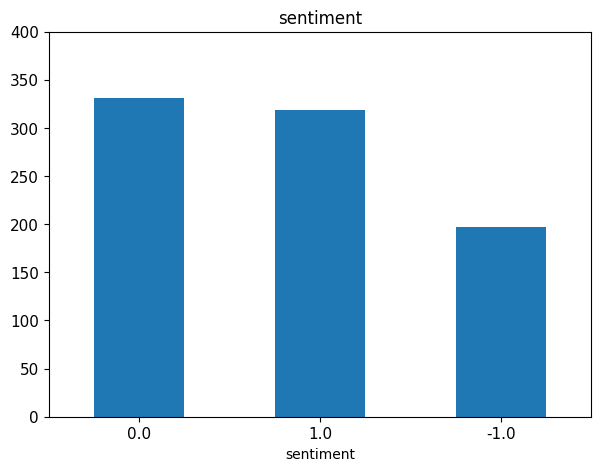

In [211]:
print(newdataset.sentiment.value_counts())

# plot barchart for X
newdataset.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment',
                                    ylim = [0, 400],        
                                    rot = 0, fontsize = 11, figsize = (7,5))

sentiment
 1.0    44
 0.0    42
-1.0    14
Name: count, dtype: int64


<Axes: title={'center': 'sentiment'}, xlabel='sentiment'>

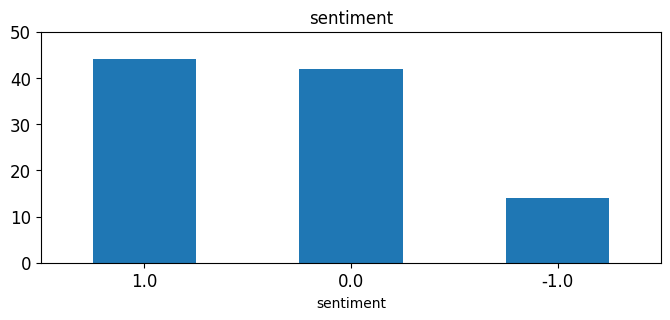

In [212]:
print(newdataset_sample.sentiment.value_counts())

# plot barchart for X_sample
newdataset_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'sentiment',
                                           ylim = [0,50], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

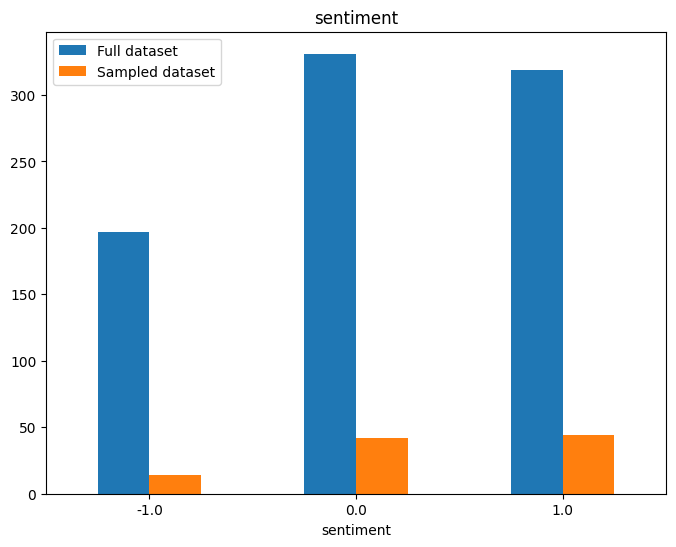

In [213]:
count_X = newdataset['sentiment'].value_counts().sort_index()
count_sample = newdataset_sample['sentiment'].value_counts().sort_index()

# 合併成一個 DataFrame
df_compare = pd.DataFrame({
    'Full dataset': count_X,
    'Sampled dataset': count_sample
})

# 繪圖
df_compare.plot(kind='bar', figsize=(8,6), rot = 0)
plt.title("sentiment")
plt.xlabel("sentiment")
plt.show()

In [214]:
count_vect = CountVectorizer()
newdataset_count = count_vect.fit_transform(newdataset.text)
print(newdataset_count[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [215]:
analyze = count_vect.build_analyzer()
analyze(newdataset.text[0])

['calls', 'on', 'retards']

In [216]:
newdataset_count.shape

(847, 4346)

In [217]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [218]:
newdataset_count[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [219]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [220]:
# 取第 5 筆文章（row 4, 因為 Python 從 0 開始算）
record = newdataset_count[4].toarray()

# 找出所有值等於 1 的欄位 index
col_indices = record.nonzero()[1]

# 對應回詞彙表
words = count_vect.get_feature_names_out()[col_indices]

#print(words[1])
print(words[1])

he


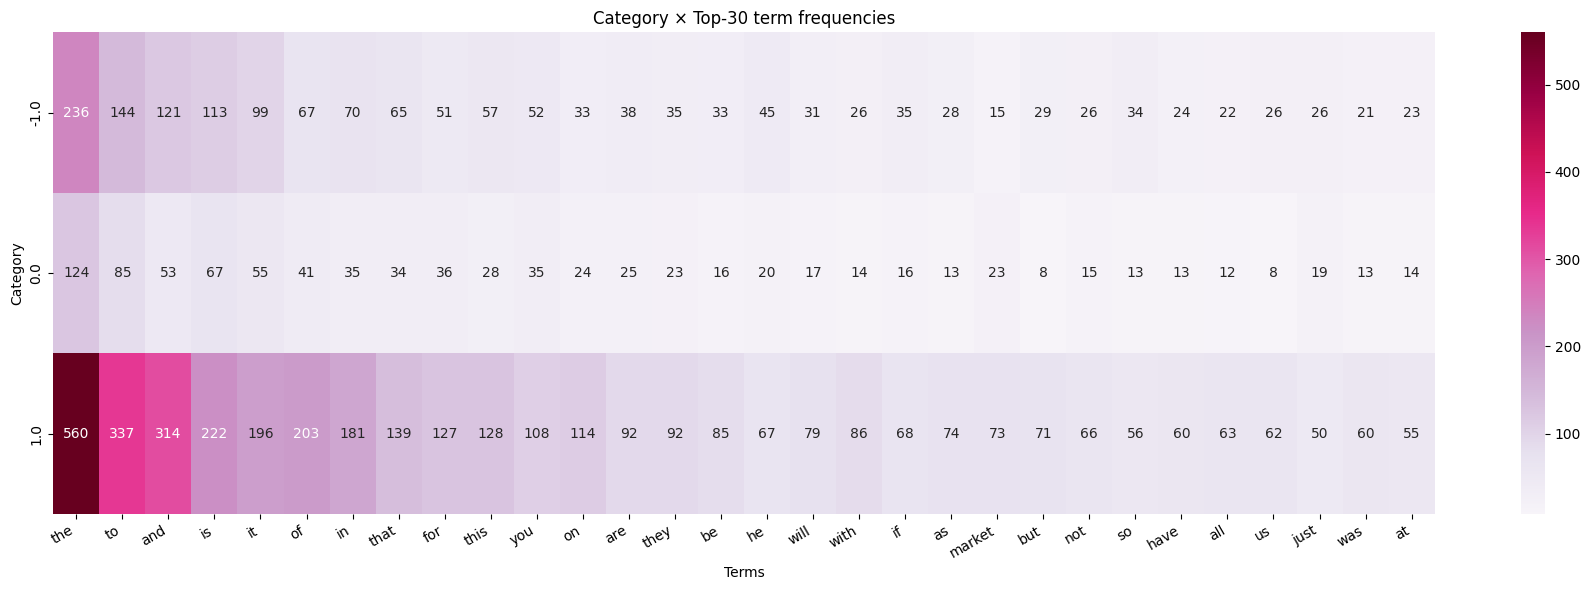

In [221]:
# 參數
TOP_K = 30  # 想看前幾個高頻詞

# 1) 取出類別編碼（避免整張轉 dense）
cats = pd.Categorical(newdataset["sentiment"])
cat_names = list(cats.categories)
cat_codes = cats.codes                      # shape: (n_docs,)

# 2) 先對每個類別把該類文件的 rows 相加（仍在稀疏矩陣計算）
#    只在最後一步才轉成 dense，記憶體友善
rows_per_cat = []
for cid in range(len(cat_names)):
    rows_per_cat.append(newdataset_count[cat_codes == cid].sum(axis=0))   # 1 x n_terms (still sparse)

# 3) 疊成 (n_categories x n_terms) 並轉 dense
cat_term_mat = np.vstack(rows_per_cat).astype(np.float64)         # still sparse objects stacked
cat_term_mat = np.asarray(cat_term_mat).squeeze()                 # to ndarray

# 4) 找整體最常見的 TOP_K 詞
vocab = count_vect.get_feature_names_out()
total_counts = cat_term_mat.sum(axis=0)                           # shape: (n_terms,)
top_idx = np.argsort(total_counts)[::-1][:TOP_K]
top_terms = vocab[top_idx]

# 5) 做成 DataFrame（index=category, columns=top terms）
plot_df = pd.DataFrame(cat_term_mat[:, top_idx], 
                       index=cat_names, columns=top_terms)

# 6) 畫熱力圖
plt.figure(figsize=(18, 6))
ax = sns.heatmap(plot_df, cmap="PuRd", annot=True, fmt=".0f")
ax.set_title(f"Category × Top-{TOP_K} term frequencies")
ax.set_xlabel("Terms")
ax.set_ylabel("Category")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [223]:
import plotly.express as px
import pandas as pd
import numpy as np

# 1) 計算詞頻
term_freq = np.asarray(newdataset_count.sum(axis=0)).ravel()
vocab = count_vect.get_feature_names_out()

# 2) 取前 300 個詞
df = pd.DataFrame({
    "term": vocab[:300],
    "frequency": term_freq[:300]
})

# 3) 用 plotly 畫互動長條圖
fig = px.bar(df, x="term", y="frequency",
             title="Term Frequencies for First 300 Terms")

fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    xaxis_tickangle=-90,
    bargap=0.2,
    height=600, width=1200
)

fig.show()

In [225]:
# 設定 最小出現次數 ex:只保留至少出現 1000 次的詞：
import numpy as np
import pandas as pd
import plotly.express as px

K = 50  # 顯示前 50 高頻詞

# 計算詞頻（整個語料庫）
term_freq = np.asarray(newdataset_count.sum(axis=0)).ravel()
vocab = count_vect.get_feature_names_out()

# 取最高頻的前 K 個詞
top_idx = term_freq.argsort()[::-1][:K]
df = pd.DataFrame({"term": vocab[top_idx], "freq": term_freq[top_idx]})

# 畫垂直長條圖
fig = px.bar(df, x="term", y="freq",
             title=f"Top {K} Most Frequent Terms")

fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,   # x 軸標籤旋轉 90 度
    bargap=0.2,
    height=600, width=1200
)

fig.show()

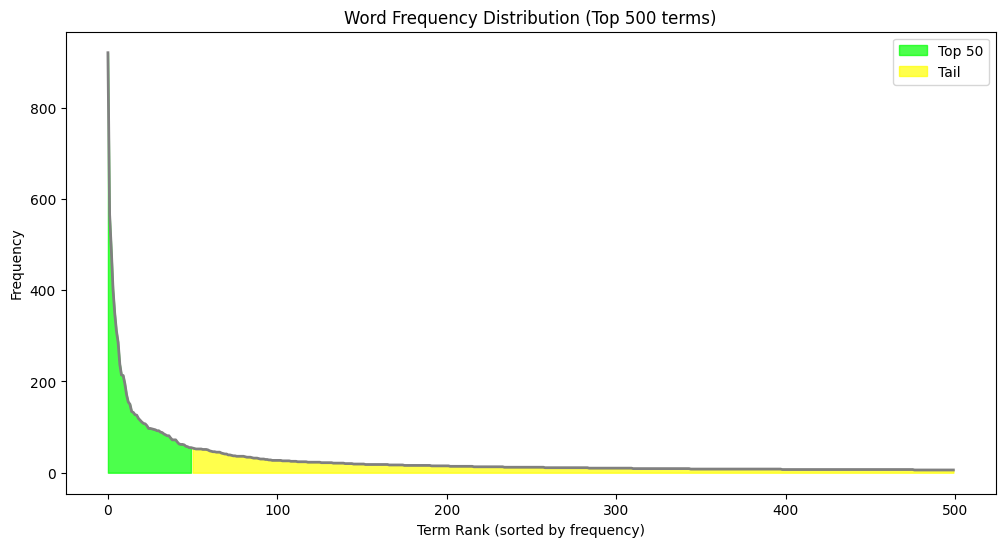

In [226]:
import numpy as np
import matplotlib.pyplot as plt

# 詞頻排序
term_freq = np.asarray(newdataset_count.sum(axis=0)).ravel()
sorted_idx = term_freq.argsort()[::-1]
sorted_freq = term_freq[sorted_idx]

# 只取前 N 個
N = 500
x = np.arange(N)

plt.figure(figsize=(12, 6))

# 前 K 當 head，其他當 tail
K = 50
plt.fill_between(x[:K], sorted_freq[:K], color="lime", alpha=0.7, label=f"Top {K}")
plt.fill_between(x[K:N], sorted_freq[K:N], color="yellow", alpha=0.7, label="Tail")
plt.plot(x, sorted_freq[:N], color="gray", linewidth=2)

plt.title(f"Word Frequency Distribution (Top {N} terms)")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


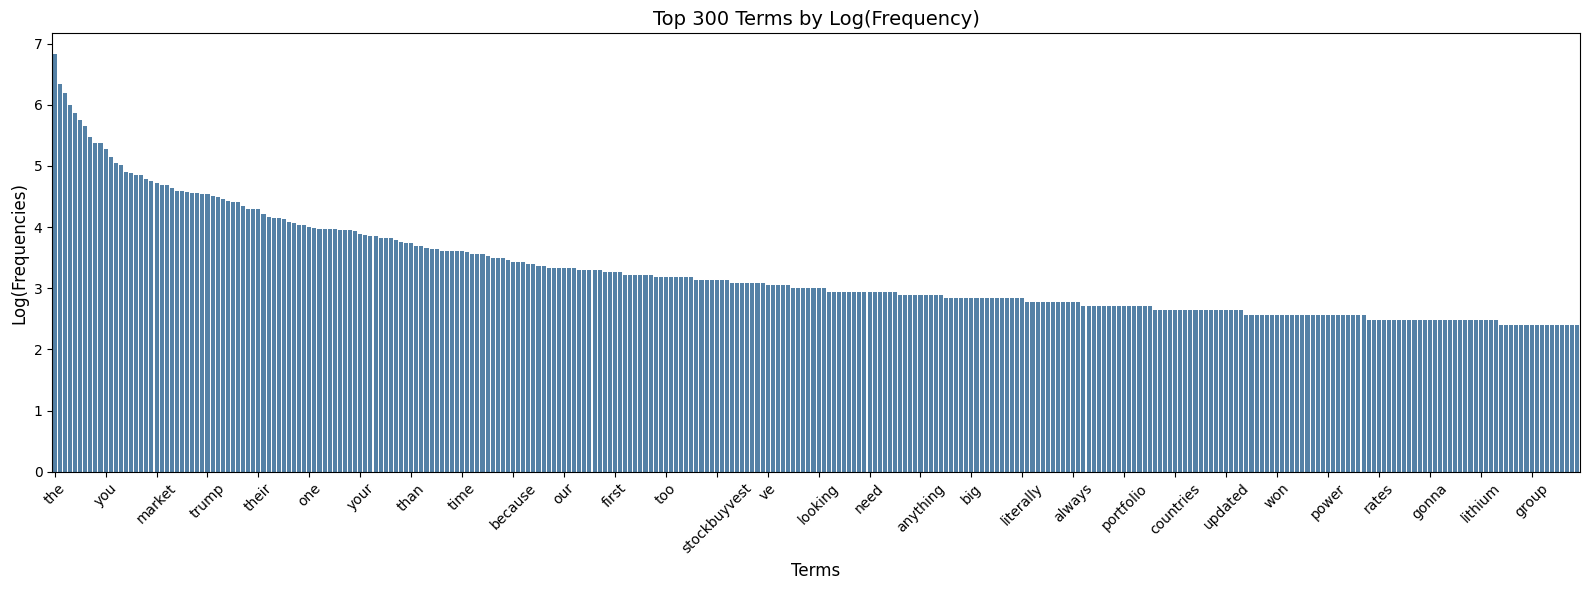

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 計算 log 頻率
term_frequencies = np.array(newdataset_count.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# 取前 N 個高頻詞
N = 300
sorted_idx = np.argsort(term_frequencies)[::-1][:N]
top_terms = np.array(terms)[sorted_idx]
top_freqs_log = np.log1p(term_frequencies[sorted_idx])  # log(1+x) 避免 log(0)

# 畫圖
plt.figure(figsize=(16,6))
sns.barplot(x=top_terms, y=top_freqs_log, color="steelblue")

plt.title(f"Top {N} Terms by Log(Frequency)", fontsize=14)
plt.xlabel("Terms", fontsize=12)
plt.ylabel("Log(Frequencies)", fontsize=12)

# 只顯示每 10 個詞
step = 10
plt.xticks(ticks=range(0, len(top_terms), step),
           labels=top_terms[::step], 
           rotation=45)

plt.tight_layout()
plt.show()

# Phase 2

In [222]:
### Begin Assignment Here